In [0]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import pickle

data = pd.read_csv('coord_full.csv')
pos = pd.read_csv('nodes_data.csv')

G = nx.from_pandas_edgelist(data, source = "JointI", target = "JointJ", create_using=nx.Graph, edge_attr = True)

positions = {}
for n in G:
    row = pos[pos["node"] == n ]
    positions[n]= (float(row['x']),float(row['y']))

nx.set_node_attributes(G,positions,"pos")
nx.relabel_nodes(G, {15012: 0})
# fig = plt.figure(1, figsize=(2000, 2000), dpi=30)
# nx.draw_networkx_labels(G, pos= positions, font_size=3)

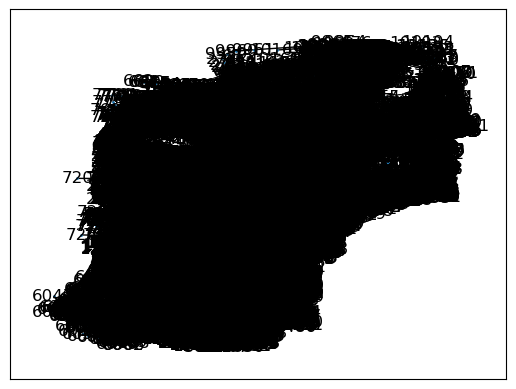

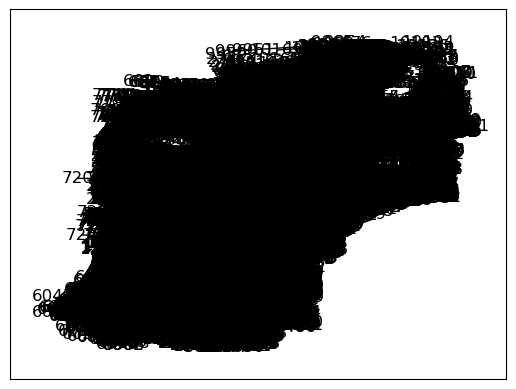

In [4]:
nx.draw_networkx(G, pos= positions,node_size = 0)


In [ ]:
check = G.edges((1,2))

print(type(G.nodes))

# positions = {}
# n=0
# for n in G:
#     row = pos[pos["node"] == n ]
#     positions[n]= (float(row['x']),float(row['y']))


In [22]:
with open('street_network.data', 'wb') as file:
    pickle.dump(G, file)

In [ ]:
from mesa import Agent, Model
import mesa.time as time
import mesa.space as space
from mesa.datacollection import DataCollector
import pickle
import random



class MinimalAgent(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)

    def step(self):
        print("Hello world! I am agent: " + str(self.unique_id))


class MinimalModel(Model):
    def __init__(self):
        self.schedule = time.RandomActivation(self)
        with open('street_network.data', 'rb') as file:
            self.streets = pickle.load(file)
        self.grid = space.NetworkGrid(self.streets)
                                      
        self.num_agents = 10

        for i in range(self.num_agents):
            a = MinimalAgent(i, self)
            self.schedule.add(a)
            location = random.choice(list(self.streets))
            self.grid.place_agent(a, location)

        model_metrics = {
            "Number of Agents": count_agents
        }

        agent_metrics = {
            "Agent ID": "unique_id"
        }

        self.datacollector = DataCollector(model_reporters=model_metrics, agent_reporters=agent_metrics)

        self.running = True
        self.datacollector.collect(self)

    def step(self):
        print("This is step: " + str(self.schedule.steps))
        self.schedule.step()
        self.datacollector.collect(self)


def count_agents(self):
    return self.num_agents

def main():
    model = MinimalModel()
    for i in range(3):
        model.step()

    # Get the Pandas Dataframe from the model, by using the table name we defined in the model
    model_data = model.datacollector.get_model_vars_dataframe()
    agent_data = model.datacollector.get_agent_vars_dataframe()
    print(model_data)
    print(agent_data)


if __name__ == '__main__':
    main()